# Prova de proficiência em Python Safra Asset

<details>
<summary><strong>Sobre mim</strong></summary>
 
* Nome: **João Pedro Tavares d"Ávila**
* Idade: **25 anos**
* Formação: **Engenheiro Ambiental (Poli-USP)**
    
* Contato: **+55 (11) 99330-5055**
* LinkedIn: **[`joaopdavila`](https://www.linkedin.com/in/joaopdavila/)**
* GitHub: **[`@joaopdavila`](https://github.com/joaopdavila)**
</details>

<br>

<details>
<summary><strong>Sobre a resolução da prova</strong></summary>
 
* Data de Resolução: **04/10/2022**
* Sistema Operacional: **Windows 10 Pro**
* Para operar com as bibliotecas _pandas_, _yfinance_, _numpy_ e _matplotlib_, em meu terminal, executei o comando `! pip install <package>` abaixo 
* Realizei os imports antes do início da resolução
</details>

In [ ]:
import sys

!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install yfinance
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install plotly

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

**Q1.** Usando o python (sugerimos o pacote yfinance ou o pandas) importe os dados de preço de
fechamento de 01/11/2017 até 01/01/2022 das ações que compõem o indice IBRX 50. Preencha dados faltantes
de cada série com as médias dos vizinhos. Mostre que o bpacFrame resultante não tem valores vazios.

<br>

<details>
<summary><strong>Detalhes de resolução</strong></summary>
 
* Eu não possuia conhecimento prévio da biblioteca yfinance, então consultei o [`seguinte`](https://pypi.org/project/yfinance/) material para obter mais detalhes
* As ações que compões o índice IBRX 50 foram extraídas do [`site`](https://www.b3.com.br/pt_br/market-bpac-e-indices/indices/indices-amplos/indice-brasil-50-ibrx-50-composicao-da-carteira.htm) da B3  referentes às ações de set/22
* Preencher um valor como a média de seus vizinhos é a mesma coisa que realizar uma interpolação linear entre os valores
  * Escolhi o método "backwards" pois nem todas as colunas possuiam valores em 01/01/2017, mas todos possuiam em 30/12/2021
    * Fonte: [`stackoverflow`](https://stackoverflow.com/questions/62655545/how-can-i-fill-nan-values-by-the-mean-of-the-adjacent-column-in-pandas-bpacframe)
</details>

In [3]:
# Part 1 - Extract the bpac

""" Declara os symbols das ações em IBRX 50 (set/22) """
tickers_list = ["ABEV3.SA","AMER3.SA","ASAI3.SA","AZUL4.SA","B3SA3.SA","BBAS3.SA",
                "BBDC4.SA","BBSE3.SA","BPAC11.SA","BRAP4.SA","BRFS3.SA","BRKM5.SA",
                "BRML3.SA","CASH3.SA","CCRO3.SA","CSAN3.SA","CSNA3.SA","CVCB3.SA",
                "ELET3.SA","ELET6.SA","EMBR3.SA","EQTL3.SA","GGBR4.SA","HAPV3.SA",
                "ITSA4.SA","ITUB4.SA","JBSS3.SA","KLBN11.SA","LREN3.SA","LWSA3.SA",
                "MGLU3.SA","MRFG3.SA","MULT3.SA","NTCO3.SA","PETR3.SA","PETR4.SA",
                "PETZ3.SA","PRIO3.SA","RADL3.SA","RAIL3.SA","RDOR3.SA","RENT3.SA",
                "RRRP3.SA","SUZB3.SA","TOTS3.SA","USIM5.SA","VALE3.SA","VBBR3.SA",
                "VIIA3.SA","WEGE3.SA"]

""" Extrai dados de Yahoo Finance """
df_raw = yf.download(tickers_list,
                 start = "2017-01-01",
                 end="2022-01-01")

""" Remove os valores nan do bpacFrame """
df = df_raw.interpolate(method='linear', limit_direction='backward')

""" Extrai as informações de Fechamento """
df_adj_close = df["Adj Close"]


""" Checa se há valores não numéricos restantes """
print("Valores não-numéricos em DF gerado?: %s" % df_adj_close.isna().values.any())

""" Apresenta do bpac Frame final da Q1 """
display(df_adj_close)


[*********************100%***********************]  50 of 50 completed
Valores não-numéricos em DF gerado?: False


,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00-02:00,13.968292,9.652307,14.074438,22.400000,4.435683,20.327688,11.686103,17.609501,3.714054,7.427600,...,64.441811,9.875569,20.799999,18.777897,7.456952,3.467025,16.782001,16.293436,3.781286,5.319252
2017-01-03 00:00:00-02:00,14.250913,9.898346,14.074438,22.400000,4.618233,21.257713,12.181044,18.236153,3.714054,7.740071,...,64.441811,10.291059,20.799999,18.777897,7.839440,3.645475,17.525339,16.293436,3.701680,5.586974
2017-01-04 00:00:00-02:00,14.139578,10.125460,14.074438,22.400000,4.705421,21.146999,12.103900,18.812164,3.714054,7.571031,...,64.441811,10.454988,20.799999,18.777897,7.792024,3.866413,17.210592,16.293436,3.771335,5.453112
2017-01-05 00:00:00-02:00,14.216657,10.428276,14.074438,22.400000,4.648203,21.095333,12.237897,18.432377,3.714054,7.950094,...,64.441811,10.296712,20.799999,18.777897,7.833118,3.908900,17.866871,16.293436,3.781286,5.439020
2017-01-06 00:00:00-02:00,14.096755,10.106532,14.074438,22.400000,4.645480,21.324148,12.315035,18.147533,3.714054,7.811786,...,64.441811,10.293882,20.799999,18.777897,7.589716,3.798431,17.391401,16.293436,3.741483,5.484816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23 00:00:00-03:00,15.550000,30.124914,13.976556,26.459999,10.993008,27.709494,17.126751,19.152811,21.020258,22.717564,...,42.190651,53.839424,31.270000,58.593819,28.504419,14.098693,72.463852,20.543537,4.500000,32.931248
2021-12-27 00:00:00-03:00,15.530000,31.271875,13.530179,25.670000,10.925388,27.766390,17.322590,19.273560,21.039848,23.323111,...,44.227985,54.134434,31.770000,58.739841,28.573847,14.269472,72.280739,20.807165,4.860000,32.636074
2021-12-28 00:00:00-03:00,15.520000,30.419008,12.994527,25.750000,10.780489,27.605179,17.260273,19.310715,20.295422,23.181187,...,45.335667,52.659382,32.070000,58.077877,28.087864,13.994329,70.541245,20.963390,4.950000,32.754150


**Q2.** Em uma célula mostre os últimos 12 dias de preços, ordenados do mais recente para o mais antigo.
Nas 2 células seguintes mostre os retornos diários para os mesmos dias, na primeira calculados usando diferença
de logaritmos e na segunda a diferença percentual. Mostre a diferença das duas medidas.

<br>

<details>
<summary><strong>Detalhes de resolução</strong></summary>
 
* Me surgiu a dúvida se os _últimos 12 dias_ no enunciado estavam fazendo referência para o dia de hoje ou para o intervalo da Q1. Assumi que se tratava dos valores no intervalo Q1
* Como material teórico de consulta, acessei o [`seguinte`](http://wilsonfreitas.github.io/posts/calculando-retornos-financeiros-com-pandas.html) link
</details>

In [4]:
last_12 = df_adj_close.iloc[-12:][::-1]
last_12_shift = last_12.shift(1)


display(last_12)


,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30 00:00:00-03:00,15.420000,30.958178,12.855654,24.360001,10.761169,27.358620,17.100044,19.273560,20.540298,23.644810,...,44.336781,52.118530,33.549999,58.515942,28.536232,14.383324,71.374374,20.895041,5.25,32.449139
2021-12-29 00:00:00-03:00,15.450000,30.409204,12.736620,23.860001,10.703209,27.462933,17.180159,19.199251,20.305218,23.171724,...,43.862061,51.233498,33.480000,57.474316,27.788948,14.041768,70.724350,20.602121,5.02,32.213001
2021-12-28 00:00:00-03:00,15.520000,30.419008,12.994527,25.750000,10.780489,27.605179,17.260273,19.310715,20.295422,23.181187,...,45.335667,52.659382,32.070000,58.077877,28.087864,13.994329,70.541245,20.963390,4.95,32.754150
2021-12-27 00:00:00-03:00,15.530000,31.271875,13.530179,25.670000,10.925388,27.766390,17.322590,19.273560,21.039848,23.323111,...,44.227985,54.134434,31.770000,58.739841,28.573847,14.269472,72.280739,20.807165,4.86,32.636074
2021-12-23 00:00:00-03:00,15.550000,30.124914,13.976556,26.459999,10.993008,27.709494,17.126751,19.152811,21.020258,22.717564,...,42.190651,53.839424,31.270000,58.593819,28.504419,14.098693,72.463852,20.543537,4.50,32.931248
2021-12-22 00:00:00-03:00,15.390000,30.017080,14.045992,26.799999,11.108926,27.813808,17.073343,19.050638,21.333702,22.547251,...,42.279659,54.714622,31.480000,58.048672,29.030075,14.136644,73.168800,20.758347,4.50,33.128033
2021-12-21 00:00:00-03:00,15.400000,30.193535,14.135267,26.440001,10.983347,27.975018,16.993227,19.059925,20.971283,22.301247,...,44.821384,54.970299,30.840000,58.399124,28.881306,14.345373,73.553322,20.846222,4.61,33.374004
2021-12-20 00:00:00-03:00,15.420000,30.477825,13.986476,24.510000,11.331636,27.899155,17.066326,18.929886,21.179144,21.127995,...,44.702705,55.068638,30.299999,58.301777,28.930895,13.918427,71.667336,21.021975,4.74,33.462555
2021-12-17 00:00:00-03:00,15.466399,30.703297,14.343576,25.420000,11.741787,28.762110,17.426821,19.078503,22.126299,21.894394,...,45.370884,55.689014,32.299999,59.878815,29.446632,14.743855,72.482155,21.578524,4.85,34.257553


In [5]:
log_diff = np.log(last_12).diff()

print("Retorno Diário logarítmica")
display(log_diff)

Retorno Diário logarítmica


,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29 00:00:00-03:00,0.001944,-0.017892,-0.009302,-0.020739,-0.005401,0.003806,0.004674,-0.003863,-0.011511,-0.020211,...,-0.010765,-0.017127,-0.002089,-0.017961,-0.026536,-0.024033,-0.009149,-0.014118,-0.044798,-0.007304
2021-12-28 00:00:00-03:00,0.004521,0.000322,0.020047,0.076231,0.007194,0.005166,0.004652,0.005789,-0.000483,0.000408,...,0.033044,0.027451,-0.043027,0.010447,0.010699,-0.003384,-0.002592,0.017384,-0.014042,0.016660
2021-12-27 00:00:00-03:00,0.000644,0.027651,0.040394,-0.003112,0.013351,0.005823,0.003604,-0.001926,0.036023,0.006104,...,-0.024736,0.027626,-0.009399,0.011333,0.017154,0.019470,0.024360,-0.007480,-0.018349,-0.003611
2021-12-23 00:00:00-03:00,0.001287,-0.037367,0.032459,0.030311,0.006170,-0.002051,-0.011370,-0.006285,-0.000932,-0.026306,...,-0.047159,-0.005464,-0.015863,-0.002489,-0.002433,-0.012040,0.002530,-0.012751,-0.076961,0.009004
2021-12-22 00:00:00-03:00,-0.010343,-0.003586,0.004956,0.012768,0.010490,0.003758,-0.003123,-0.005349,0.014801,-0.007525,...,0.002107,0.016125,0.006693,-0.009347,0.018273,0.002688,0.009681,0.010402,0.000000,0.005958
2021-12-21 00:00:00-03:00,0.000650,0.005861,0.006336,-0.013524,-0.011369,0.005779,-0.004704,0.000487,-0.017134,-0.010971,...,0.058379,0.004662,-0.020540,0.006019,-0.005138,0.014657,0.005242,0.004224,0.024150,0.007397
2021-12-20 00:00:00-03:00,0.001298,0.009372,-0.010582,-0.075797,0.031218,-0.002715,0.004292,-0.006846,0.009863,-0.054044,...,-0.002651,0.001787,-0.017665,-0.001668,0.001716,-0.030214,-0.025976,0.008396,0.027809,0.002650
2021-12-17 00:00:00-03:00,0.003005,0.007371,0.025211,0.036455,0.035556,0.030462,0.020903,0.007820,0.043750,0.035632,...,0.014837,0.011203,0.063920,0.026690,0.017670,0.057613,0.011305,0.026130,0.022942,0.023480


In [6]:
perc_diff = (last_12 - last_12_shift) / last_12_shift

print("Retorno Diário percentual")
display(perc_diff)

return_diff = log_diff - perc_diff

print("Diferença em Retorno logarítmico e percentual")
display(return_diff)

Retorno Diário percentual


,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29 00:00:00-03:00,0.001946,-0.017733,-0.009259,-0.020525,-0.005386,0.003813,0.004685,-0.003855,-0.011445,-0.020008,...,-0.010707,-0.016981,-0.002086,-0.017801,-0.026187,-0.023747,-0.009107,-0.014019,-0.043810,-0.007277
2021-12-28 00:00:00-03:00,0.004531,0.000322,0.020249,0.079212,0.007220,0.005180,0.004663,0.005806,-0.000482,0.000408,...,0.033596,0.027831,-0.042115,0.010501,0.010757,-0.003378,-0.002589,0.017536,-0.013944,0.016799
2021-12-27 00:00:00-03:00,0.000644,0.028037,0.041221,-0.003107,0.013441,0.005840,0.003610,-0.001924,0.036680,0.006122,...,-0.024433,0.028011,-0.009355,0.011398,0.017302,0.019661,0.024659,-0.007452,-0.018182,-0.003605
2021-12-23 00:00:00-03:00,0.001288,-0.036677,0.032991,0.030775,0.006189,-0.002049,-0.011305,-0.006265,-0.000931,-0.025963,...,-0.046064,-0.005450,-0.015738,-0.002486,-0.002430,-0.011968,0.002533,-0.012670,-0.074074,0.009044
2021-12-22 00:00:00-03:00,-0.010289,-0.003580,0.004968,0.012850,0.010545,0.003765,-0.003118,-0.005335,0.014912,-0.007497,...,0.002110,0.016256,0.006716,-0.009304,0.018441,0.002692,0.009728,0.010456,0.000000,0.005976
2021-12-21 00:00:00-03:00,0.000650,0.005878,0.006356,-0.013433,-0.011304,0.005796,-0.004692,0.000487,-0.016988,-0.010911,...,0.060117,0.004673,-0.020330,0.006037,-0.005125,0.014765,0.005255,0.004233,0.024444,0.007425
2021-12-20 00:00:00-03:00,0.001299,0.009416,-0.010526,-0.072995,0.031711,-0.002712,0.004302,-0.006823,0.009912,-0.052609,...,-0.002648,0.001789,-0.017510,-0.001667,0.001717,-0.029762,-0.025641,0.008431,0.028199,0.002653
2021-12-17 00:00:00-03:00,0.003009,0.007398,0.025532,0.037128,0.036195,0.030931,0.021123,0.007851,0.044721,0.036274,...,0.014947,0.011266,0.066007,0.027050,0.017827,0.059305,0.011369,0.026475,0.023207,0.023758


Diferença em Retorno logarítmico e percentual


,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29 00:00:00-03:00,-1.890050e-06,-1.591087e-04,-0.000043,-0.000214,-1.455722e-05,-0.000007,-0.000011,-7.451436e-06,-6.599637e-05,-2.028707e-04,...,-0.000058,-0.000146,-0.000002,-0.000160,-0.000349,-0.000286,-0.000042,-9.918862e-05,-0.000989,-2.660765e-05
2021-12-28 00:00:00-03:00,-1.023311e-05,-5.195806e-08,-0.000202,-0.002981,-2.594135e-05,-0.000013,-0.000011,-1.678766e-05,-1.164138e-07,-8.335539e-08,...,-0.000552,-0.000380,-0.000913,-0.000055,-0.000057,-0.000006,-0.000003,-1.519733e-04,-0.000098,-1.395441e-04
2021-12-27 00:00:00-03:00,-2.074613e-07,-3.858498e-04,-0.000827,-0.000005,-8.952744e-05,-0.000017,-0.000007,-1.853399e-06,-6.566845e-04,-1.866559e-05,...,-0.000303,-0.000385,-0.000044,-0.000064,-0.000148,-0.000191,-0.000299,-2.790703e-05,-0.000167,-6.513408e-06
2021-12-23 00:00:00-03:00,-8.285797e-07,-6.895165e-04,-0.000533,-0.000464,-1.907438e-05,-0.000002,-0.000064,-1.970736e-05,-4.337506e-07,-3.429987e-04,...,-0.001095,-0.000015,-0.000125,-0.000003,-0.000003,-0.000072,-0.000003,-8.094968e-05,-0.002887,-4.065561e-05
2021-12-22 00:00:00-03:00,-5.330160e-05,-6.421946e-06,-0.000012,-0.000082,-5.520777e-05,-0.000007,-0.000005,-1.427986e-05,-1.100838e-04,-2.824352e-05,...,-0.000002,-0.000131,-0.000022,-0.000044,-0.000168,-0.000004,-0.000047,-5.428901e-05,0.000000,-1.778327e-05
2021-12-21 00:00:00-03:00,-2.109802e-07,-1.721080e-05,-0.000020,-0.000091,-6.437949e-05,-0.000017,-0.000011,-1.187817e-07,-1.459532e-04,-5.995714e-05,...,-0.001738,-0.000011,-0.000210,-0.000018,-0.000013,-0.000108,-0.000014,-8.935015e-06,-0.000294,-2.742874e-05
2021-12-20 00:00:00-03:00,-8.426217e-07,-4.405049e-05,-0.000056,-0.002801,-4.924013e-04,-0.000004,-0.000009,-2.338069e-05,-4.879866e-05,-1.434403e-03,...,-0.000004,-0.000002,-0.000155,-0.000001,-0.000001,-0.000452,-0.000334,-3.534163e-05,-0.000390,-3.513733e-06
2021-12-17 00:00:00-03:00,-4.518045e-06,-2.723015e-05,-0.000320,-0.000673,-6.396559e-04,-0.000469,-0.000220,-3.065802e-05,-9.711409e-04,-6.424165e-04,...,-0.000111,-0.000063,-0.002087,-0.000359,-0.000157,-0.001692,-0.000064,-3.443880e-04,-0.000265,-2.778258e-04


**Q3.** Escolha 2 ações das 50 estudadas, que tenham sido negociadas desde pelo menos 01/11/2017, deixe
claro quais você escolheu. Apresente graficamente o histórico de preços, de variação e a distribuição dos retornos
diários delas. Cada ação deve ter seus gráficos apresentados como output de uma única célula.

<br>

<details>
<summary><strong>Detalhes de resolução</strong></summary>
 
* Ações selecionadas: Banco BTG Pactual S.A. (BPAC11.SA) e Itaú Unibanco Holding S.A. (ITUB4.SA)
* Como a execução do código se repetirá para duas ações distintas, estruturei uma função chamada `q3`
</details>

[*********************100%***********************]  1 of 1 completed


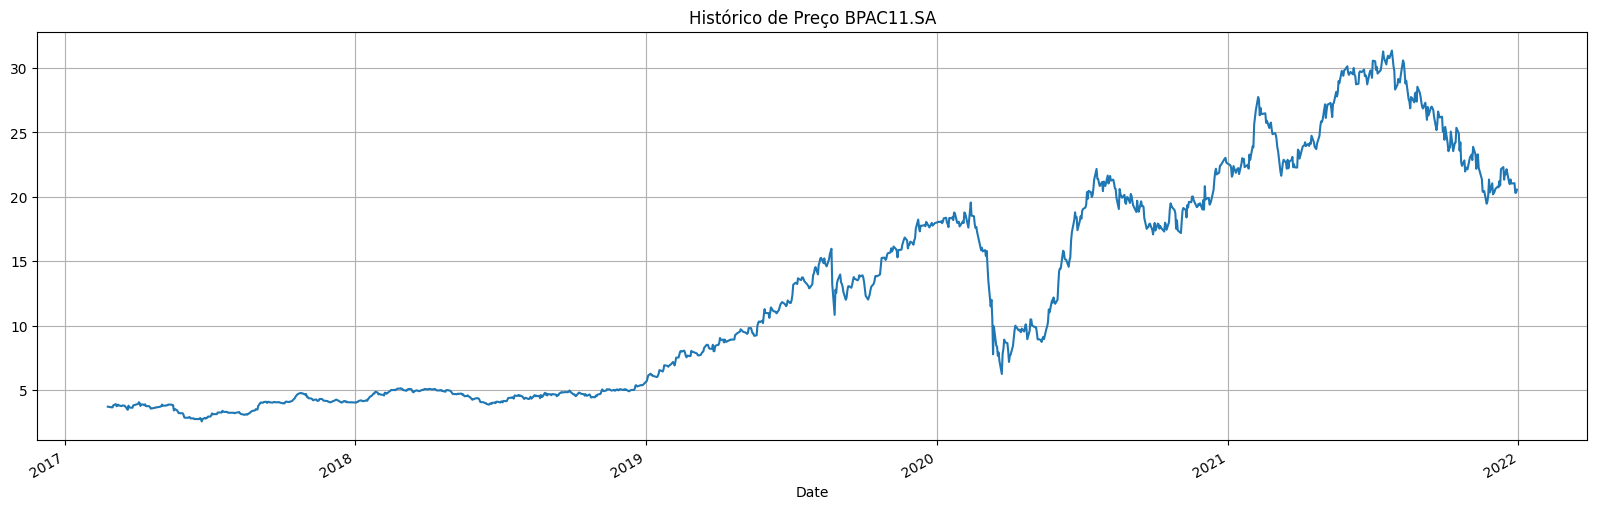

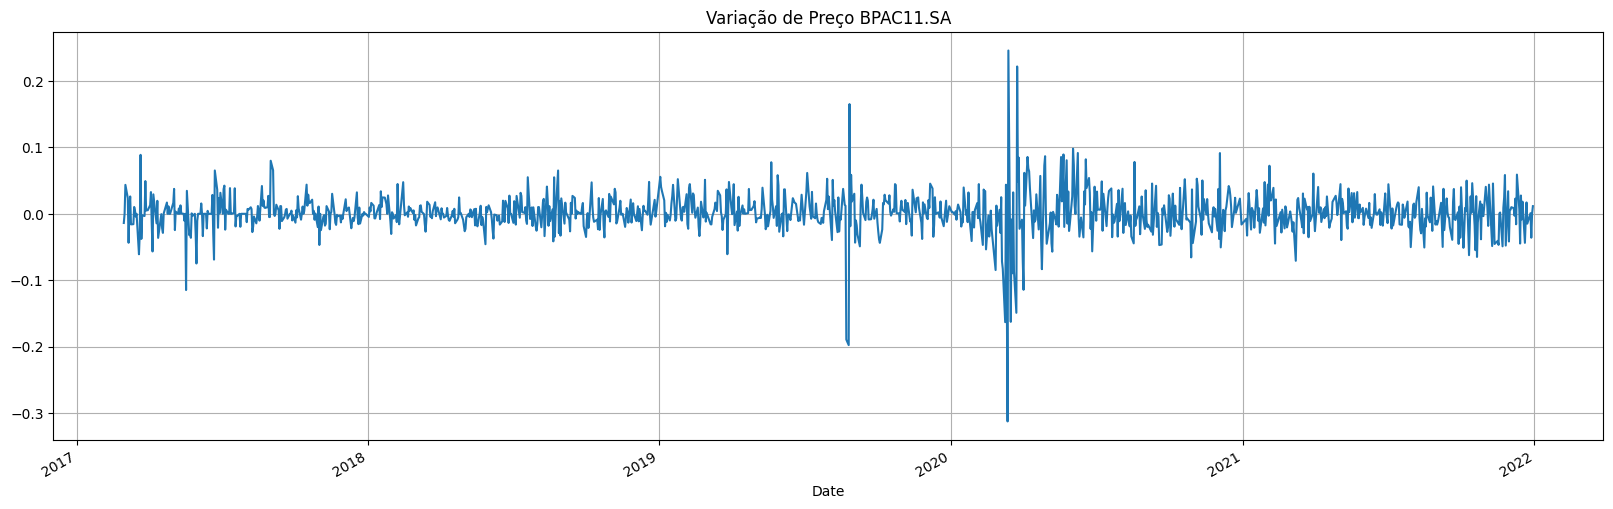

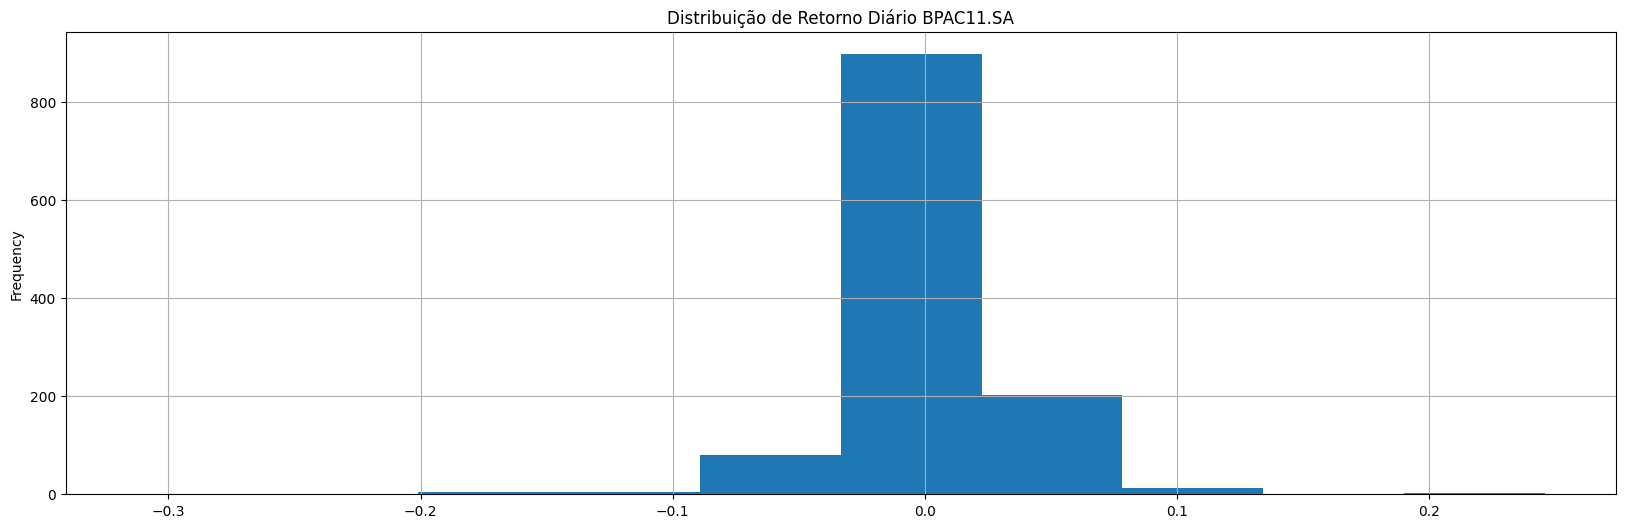

In [7]:
def q3(stock):

    """ Get Data """
    stock_raw = yf.download(stock,
                            start = "2017-01-01",
                            end="2022-01-01")

    stock_df = stock_raw.interpolate(method='linear', limit_direction='backward')

    stock_prices = stock_df["Adj Close"]

    stock_variation = np.log(stock_prices).diff()

    """ Plot First Graph"""
    stock_prices.plot(title="Histórico de Preço %s" % stock,
                      figsize=(20,6),
                      grid=True)

    plt.show()

    """ Plot Second Graph"""    
    plt.clf() # Clear previous plot
    stock_variation.plot(title="Variação de Preço %s" % stock,
                         figsize=(20,6),
                         grid=True)
    plt.show()
    
    """ Plot Third Graph"""
    plt.clf() # Clear previous plot
    stock_variation.plot.hist(title="Distribuição de Retorno Diário %s" % stock,
                              figsize=(20,6),
                              grid=True)
    plt.show()

""" Ação escolhida foi Banco BTG Pactual S.A. (BPAC11.SA) """
q3("BPAC11.SA")

[*********************100%***********************]  1 of 1 completed


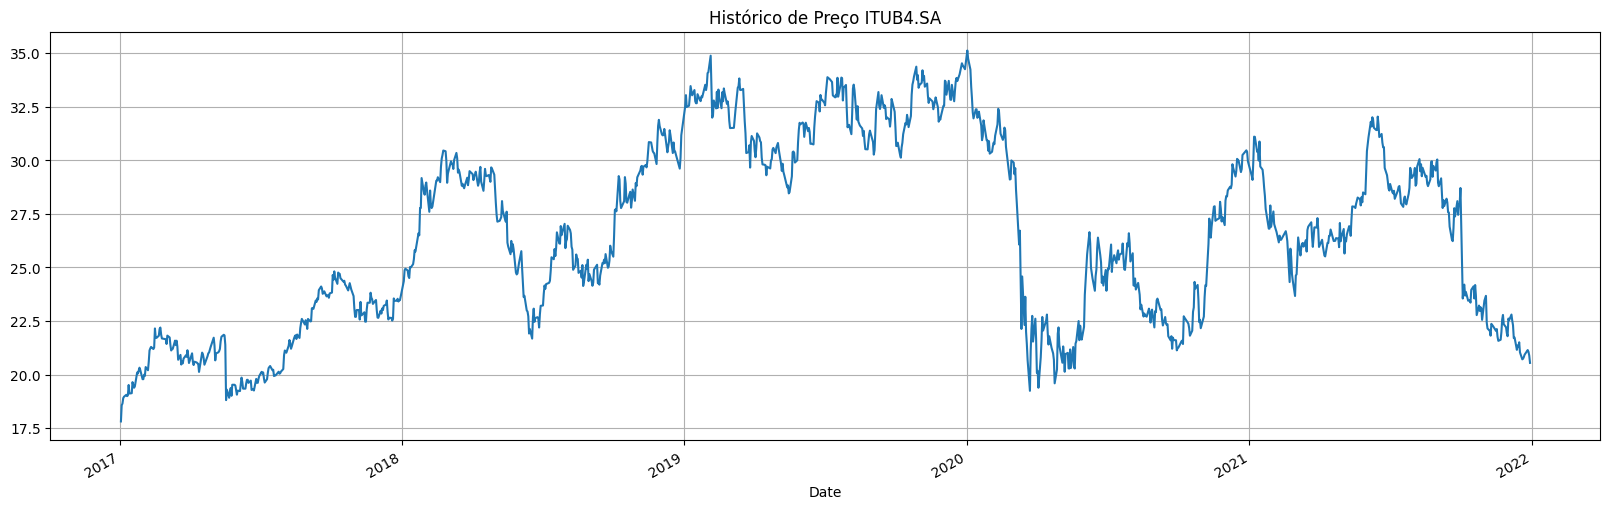

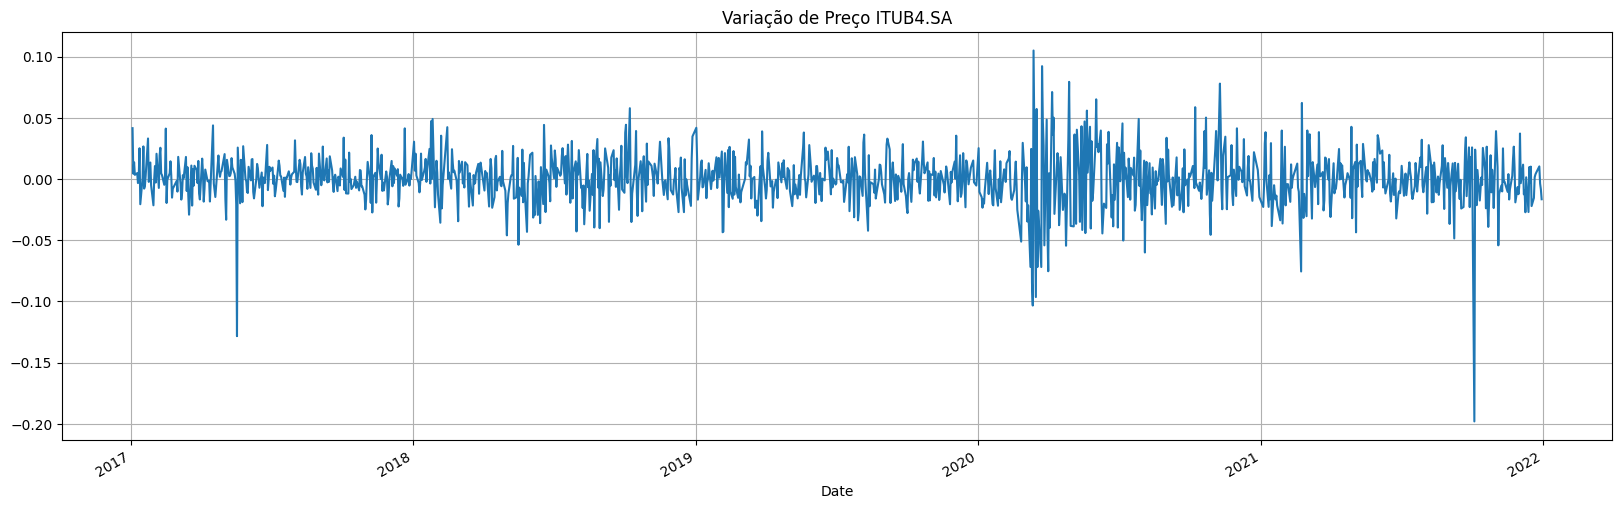

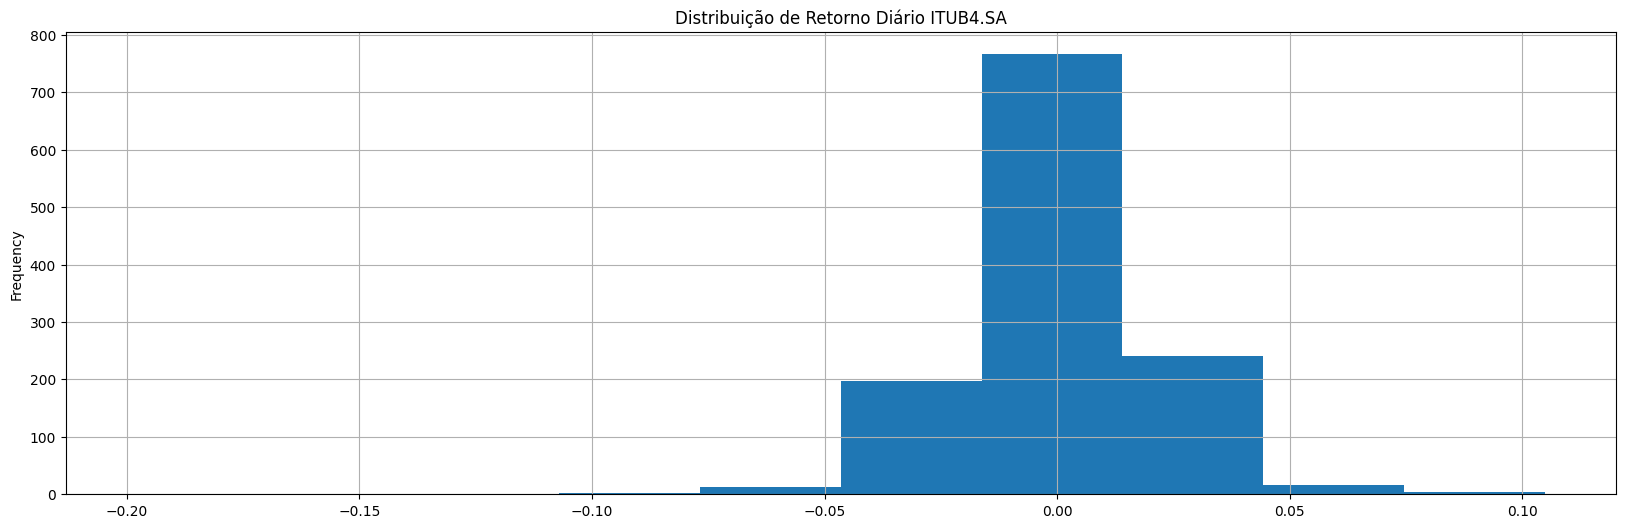

In [8]:
""" Ação escolhida foi Itaú Unibanco Holding S.A. (ITUB4.SA) """
q3("ITUB4.SA")

**Q4.** Crie dataframes com os retornos mensais e trimestrais das 2 ações e a variação do IBOVESPA. A partir
desses mostre a média, mediana, variança, 1o e 3o quartil para o retorno trimestrais e mensais das ações.

<br>

<details>
<summary><strong>Detalhes de resolução</strong></summary>
 
* Ações selecionadas: Banco BTG Pactual S.A. (BPAC11.SA) e Itaú Unibanco Holding S.A. (ITUB4.SA)
* Como a execução do código se repetirá para duas ações distintas, estruturei uma função chamada `q4`
</details>

In [9]:
def q4(stock):

    """ Get Data 1MO """
    df_mensal = yf.download(stock,
                            interval="1mo",
                            start = "2017-01-01",
                            end="2022-01-01")

    return_1mo = np.log(df_mensal["Adj Close"]).diff()

    """ Get Data 3MO """
    df_trimestral = yf.download(stock,
                                interval="3mo",
                                start = "2017-01-01",
                                end="2022-01-01")

    return_3mo = np.log(df_trimestral["Adj Close"]).diff()

    """ Get Data Ibovespa """
    df_bvsp = yf.download("^BVSP",
                          interval="1mo",
                          start = "2017-01-01",
                          end="2022-01-01")

    return_bvsp = np.log(df_bvsp["Adj Close"]).diff()


    """ Concat Informations """
    retornos_raw = pd.DataFrame({
                                "Mensal": return_1mo, 
                                "Trimestral": return_3mo,
                                "IBOVESPA": return_bvsp
                                })

    df_retornos = retornos_raw.interpolate(method='linear',
                                           limit_direction='backward')

    display(df_retornos)

    """ Set Values Mensal """
    media = df_retornos["Mensal"].mean()
    mediana = df_retornos["Mensal"].median()
    varianca = df_retornos["Mensal"].var()
    first_qa = df_retornos["Mensal"].quantile(0.25)
    third_qa = df_retornos["Mensal"].quantile(0.75)

    result_mensal = (f"Retornos Mensais:\n\t- Média:{media}\n\t- Mediana:{mediana}"
                     f"\n\t- Variança:{varianca}\n\t- 1º Quartil:{first_qa}"
                     f"\n\t- 3º Quartil:{third_qa}\n\n")
                     
    print(result_mensal)

    """ Set Values Trimestral """
    media = df_retornos["Trimestral"].mean()
    mediana = df_retornos["Trimestral"].median()
    varianca = df_retornos["Trimestral"].var()
    first_qa = df_retornos["Trimestral"].quantile(0.25)
    third_qa = df_retornos["Trimestral"].quantile(0.75)
    
    result_trimestral = (f"Retornos Trimestrais:\n\t- Média:{media}\n\t- Mediana:{mediana}"
                         f"\n\t- Variança:{varianca}\n\t- 1º Quartil:{first_qa}"
                         f"\n\t- 3º Quartil:{third_qa}\n\n")
                     
    print(result_trimestral)


""" Ação escolhida foi Banco BTG Pactual S.A. (BPAC11.SA) """
q4("BPAC11.SA")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Mensal,Trimestral,IBOVESPA
Date,,,
2017-01-01 00:00:00-02:00,-0.054067,-0.169076,0.030322
2017-02-01 00:00:00-02:00,-0.054067,-0.169076,0.030322
2017-03-01 00:00:00-03:00,-0.054067,-0.169076,-0.025494
2017-04-01 00:00:00-03:00,-0.054067,-0.169076,0.006427
2017-05-01 00:00:00-03:00,-0.240657,-0.169076,-0.042031
...,...,...,...
2021-10-01 00:00:00-03:00,-0.098716,NaN,-0.069760
2021-10-31 00:00:00-03:00,-0.091960,NaN,-0.015442
2021-11-30 00:00:00-03:00,0.014893,NaN,0.028125


Retornos Mensais:
	- Média:0.013802274366244614
	- Mediana:0.014893354305325346
	- Variança:0.022540672197417847
	- 1º Quartil:-0.04957867520650838
	- 3º Quartil:0.10772739718843205


Retornos Trimestrais:
	- Média:0.15886656398706464
	- Mediana:0.14729934930174984
	- Variança:0.0619843419227841
	- 1º Quartil:-0.07526940486787398
	- 3º Quartil:0.3209346365209981




In [10]:
""" Ação escolhida foi Itaú Unibanco Holding S.A. (ITUB4.SA) """
q4("ITUB4.SA")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Mensal,Trimestral,IBOVESPA
Date,,,
2017-01-01 00:00:00-02:00,0.035630,0.203543,0.030322
2017-01-02 00:00:00-02:00,0.035630,0.203543,0.030322
2017-02-01 00:00:00-02:00,0.035630,0.203543,0.030322
2017-02-21 00:00:00-03:00,0.035630,0.203543,0.002414
2017-03-01 00:00:00-03:00,0.035630,0.203543,-0.025494
...,...,...,...
2021-10-01 00:00:00-03:00,-0.215512,-0.312641,-0.069760
2021-10-31 00:00:00-03:00,-0.040196,NaN,-0.015442
2021-11-30 00:00:00-03:00,-0.048090,NaN,0.028125


Retornos Mensais:
	- Média:0.01561156185895828
	- Mediana:0.01405647661023465
	- Variança:0.003152848376007625
	- 1º Quartil:-0.013391749839996891
	- 3º Quartil:0.03733815239794824


Retornos Trimestrais:
	- Média:0.07817716534136963
	- Mediana:0.14232076059825793
	- Variança:0.027020782277305463
	- 1º Quartil:-0.005690677388637676
	- 3º Quartil:0.203542709283977




**Q5.** Utilizando os dados dessas mesmas 2 ações implemente uma estratégia de trade para cada uma delas
usando Índice de Força Relativa, com janela de 21 dias úteis e pontos de entrada de 75 e 25. Mostre o resultado
das estratégias para o período de 01/01/2018 a 31/12/2021

<br>

<details>
<summary><strong>Detalhes de resolução</strong></summary>
 
* Estratégia de Trade: Todas as operações serão feitas em volume de 100 ações
  * Compra
    * RSI < 25 e total de ações abaixo de limite de 500
  * Venda
    * RSI > 25 e total de ações maior ou igual a zero
</details>

In [11]:
def get_rsi(data, n):

    delta = data['Close'].diff(1)
    
    loss = delta.copy()
    gains = delta.copy()
    gains[gains < 0] = 0
    loss[loss > 0] = 0

    avg_gain = gains.rolling(n).mean()
    avg_loss = loss.rolling(n).mean()

    wsm_gain = (((avg_gain) * (n-1)) + gains) / n
    wsm_loss = (((avg_loss) * (n-1)) + loss) / n

    relative_force = -(wsm_gain / wsm_loss)
    rsi = 100 - 100 / (1 + relative_force)

    return rsi

def buy_sell_strategy(df, limit, amount):

    bought = 0
    bought_amount = 0

    sold_amount = 0
    sold = 0

    for i in range(len(df)):

        if df["RSI"][i] < 25 and bought - sold <= limit: #buy
            bought += amount
            bought_amount += df["Close"][i]

        if df["RSI"][i] > 75 and bought - sold > 0: # sell
            sold += amount
            sold_amount += df["Close"][i]

    earnings = sold_amount - bought_amount

    print("Total de ações compradas: %s" % bought)
    print("Total de dinheiro gasto em compras: %s" % bought_amount)
    print("Total de ações vendidas: %s" % sold)
    print("Total de dinheiro recuperado em vendas: %s" % sold_amount)
    print("Total de Lucro: %s" % earnings)


def q5(stock):
    
    """ Get Data """
    stock_raw = yf.download(stock,
                            start = "2017-12-01",
                            end="2021-12-31")

    full_df = stock_raw.interpolate(method='linear', limit_direction='backward')

    """ Get RSI """
    full_df["RSI"] = get_rsi(full_df, 21)

    stock_df = full_df.filter(["Date", "Close", "RSI"]).iloc[21:]

    """ Buy / Sell Strategy """
    buy_sell_strategy(stock_df, 500, 100)

    display(stock_df)

    

""" Ação escolhida foi Banco BTG Pactual S.A. (BPAC11.SA) """
q5("BPAC11.SA")


[*********************100%***********************]  1 of 1 completed
Total de ações compradas: 1300
Total de dinheiro gasto em compras: 109.09250068664551
Total de ações vendidas: 1300
Total de dinheiro recuperado em vendas: 157.6449999809265
Total de Lucro: 48.552499294281006


,Close,RSI
Date,,
2018-01-02 00:00:00-02:00,4.725000,47.476968
2018-01-03 00:00:00-02:00,4.770000,47.964414
2018-01-04 00:00:00-02:00,4.787500,46.142030
2018-01-05 00:00:00-02:00,4.692500,34.549425
2018-01-08 00:00:00-02:00,4.750000,43.264132
...,...,...
2021-12-23 00:00:00-03:00,21.459999,52.315291
2021-12-27 00:00:00-03:00,21.480000,48.267049
2021-12-28 00:00:00-03:00,20.719999,45.639930


In [12]:

""" Ação escolhida foi Itaú Unibanco Holding S.A. (ITUB4.SA) """
q5("ITUB4.SA")

[*********************100%***********************]  1 of 1 completed
Total de ações compradas: 1900
Total de dinheiro gasto em compras: 510.66333389282227
Total de ações vendidas: 1300
Total de dinheiro recuperado em vendas: 405.84666442871094
Total de Lucro: -104.81666946411133


,Close,RSI
Date,,
2018-01-02 00:00:00-02:00,29.253332,71.459121
2018-01-03 00:00:00-02:00,29.453333,66.604137
2018-01-04 00:00:00-02:00,30.066666,74.023203
2018-01-05 00:00:00-02:00,30.153334,70.403010
2018-01-08 00:00:00-02:00,30.053333,68.473974
...,...,...
2021-12-23 00:00:00-03:00,21.340000,36.376935
2021-12-27 00:00:00-03:00,21.559999,37.720920
2021-12-28 00:00:00-03:00,21.480000,36.989338


**Q6.** Apresente as métricas e gráficos que achar relevantes sobre as estratégias da Q5, comparando as
duas ações e avaliando cada estratégia em comparação ao desempenho do IBOVESPA.
Bonus. Comente e, se possível, implemente como seria possível melhorar as estratégias testadas.

<br>

<details>
<summary><strong>Detalhes de resolução</strong></summary>
 
* Utilizazrei a geração de gráficos para fazer uma análise que disponibilizarei ao final
</details>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


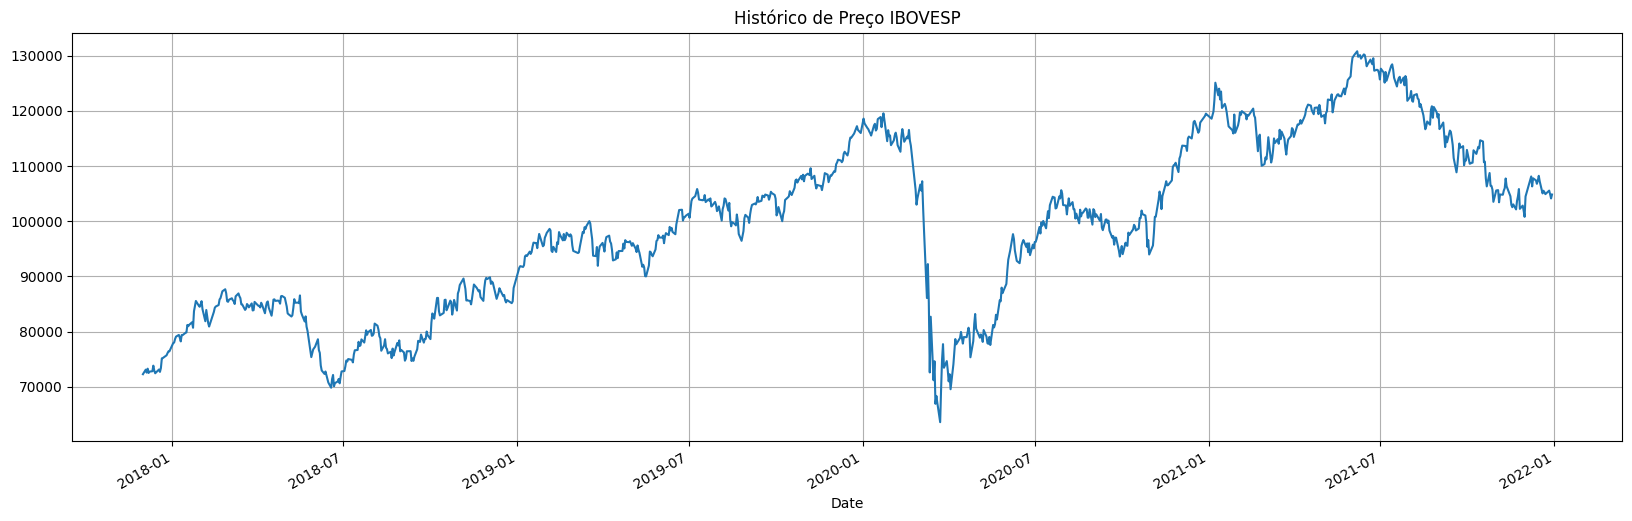

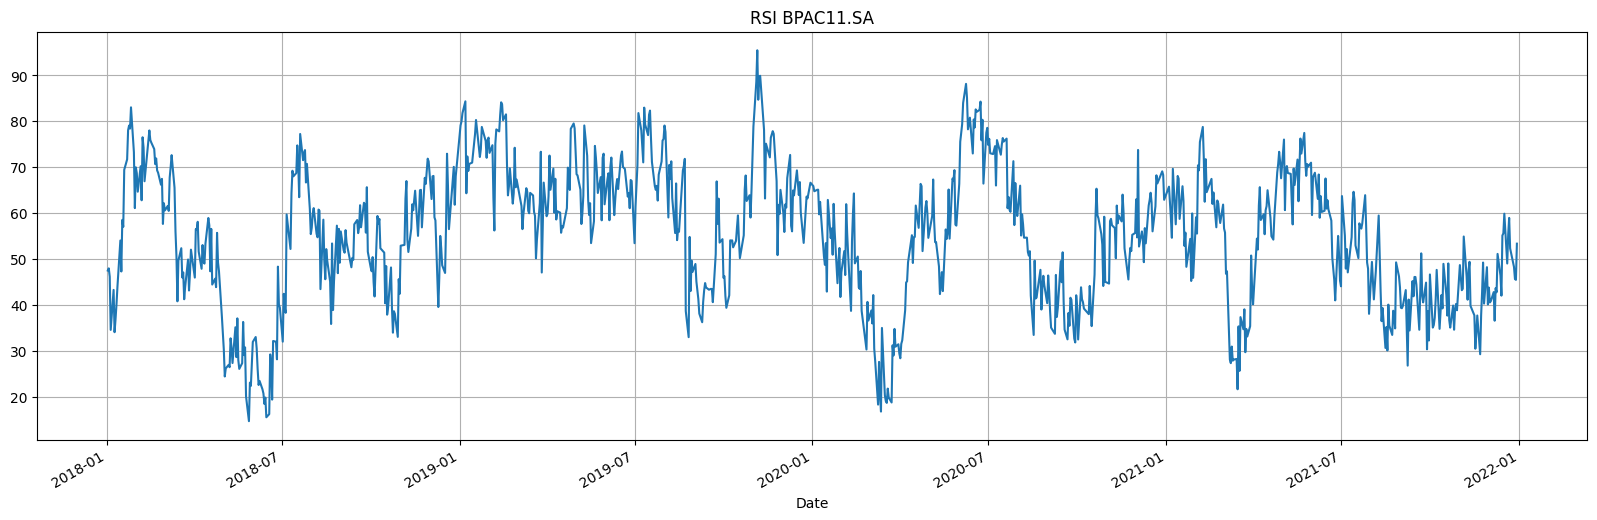

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


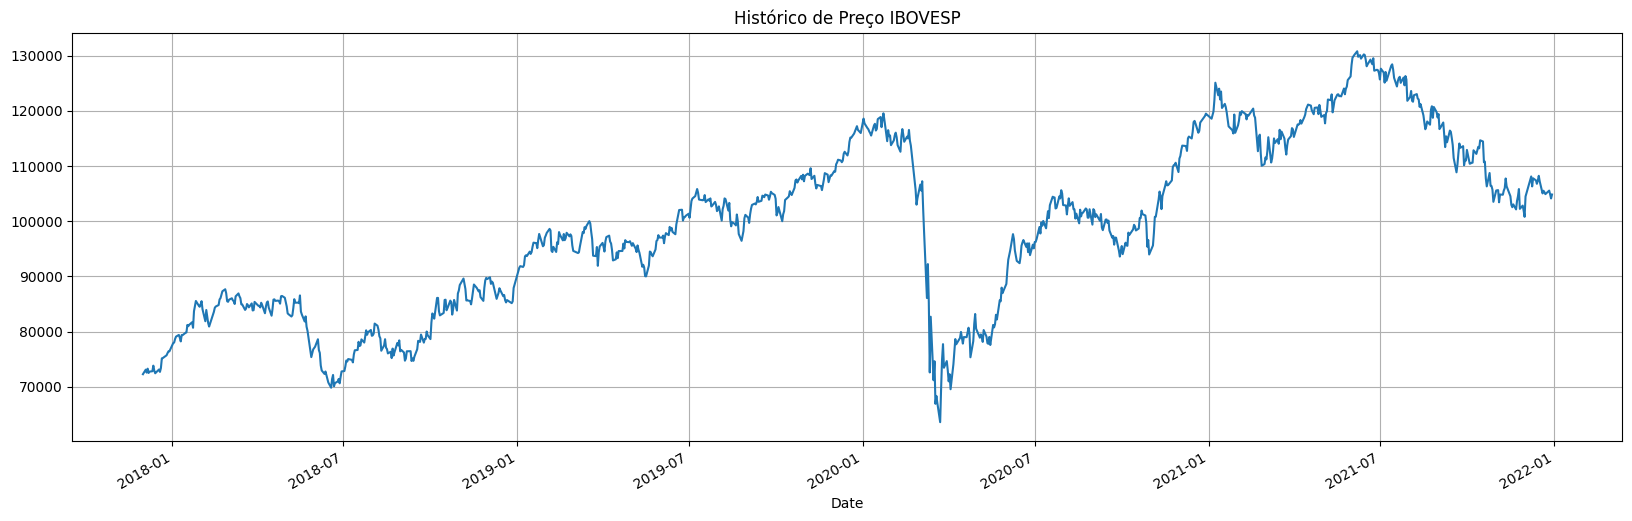

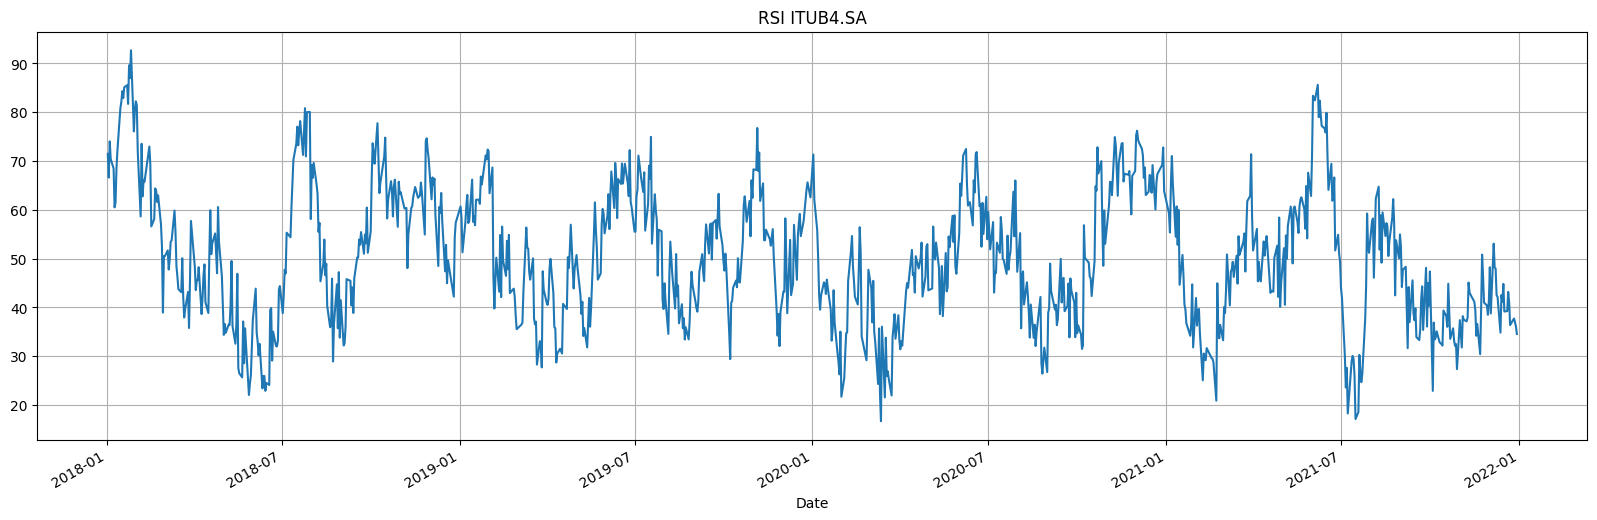

<Figure size 640x480 with 0 Axes>

In [13]:
def q6(stock):
    
    """ Get Data """
    stock_raw = yf.download(stock,
                            start = "2017-12-01",
                            end="2021-12-31")

    bvsp_data = yf.download("^BVSP",
                            start = "2017-12-01",
                            end="2021-12-31")

    full_df = stock_raw.interpolate(method='linear', limit_direction='backward')

    """ Get RSI """
    full_df["RSI"] = get_rsi(full_df, 21)

    stock_df = full_df.filter(["Date", "Close", "RSI"]).iloc[21:]

    """ Plot IBOVESP Graph """    

    bvsp_data["Close"].plot(title="Histórico de Preço IBOVESP",
                            figsize=(20,6),
                            grid=True)

    plt.show()

    """ Plot Second Graph"""    
    plt.clf() # Clear previous plot
    stock_df["RSI"].plot(title="RSI %s" % stock,
                        figsize=(20,6),
                        grid=True)

    plt.show() 
    plt.clf() # Clear previous plot

""" Ação escolhida foi Banco BTG Pactual S.A. (BPAC11.SA) """
q6("BPAC11.SA")
    
""" Ação escolhida foi Itaú Unibanco Holding S.A. (ITUB4.SA) """
q6("ITUB4.SA")

* Após a análise das visões gráficas geradas em Q6, é possível dizer que as variações de RSI têm alguma correlação com a IBOVESPA, mas variam em ritmos diferentes.
* A estratégia em Q5 poderia levar em conta um parâmetro como a derivada do gráfico de histórico de preços da IBOVESPA e acompanhar seu ritmo de crescimento ou decaimento